## Activation functions

> Simply adds non-linearity to the nn, by squishing values non-linearly, or chopping of a section below 0 or scaling one section meanwhile retaining other, etc..

### ReLU and its variants

In [ ]:
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt

# rectified linear unit
def relu(x):
    # max(0, x)
    # backprop - differentiation : -ve value is 0, +ve value is 1
    return torch.max(torch.zeros_like(x), x)

# leaky rectified linear unit
def leaky_relu(x, negative_slope=0.01):
    # max(0, x) + negative_slope * min(0, x)
    # backprop - differentiation : -ve value is negative_slope, +ve value is 1
    return torch.max(torch.zeros_like(x), x) + negative_slope * torch.min(torch.zeros_like(x), x)

# parametric rectified linear unit
def parametric_relu(x, weight=torch.tensor(-0.1)):
    # max(0, x) + weight * min(0, x)
    # backprop - differentiation : -ve value is weight, +ve value is 1
    # same as leaky relu, but weight is a learnable parameter
    return torch.max(torch.zeros_like(x), x) + weight * torch.min(torch.zeros_like(x), x)

# exponential linear unit
def elu(x, alpha=1.0):
    # max(0, x) + alpha * (exp(min(0, x)) -1)
    # backprpop - differentiation : -ve value is alpha * exp(x), +ve value is 1
    return torch.max(torch.zeros_like(x), x) + alpha * (torch.exp(torch.min(torch.zeros_like(x), x)) - 1)

# validate the custom function with the torch function
def validate(title, custom_fn, torch_fn, **kwargs):
    x = torch.tensor(range(-100, 100, 1), dtype=torch.float32)
    y_c = custom_fn(x, **kwargs)
    y_t = torch_fn(x, **kwargs)

    if torch.allclose(y_c, y_t):
        print(f"{title} Validation passed")
    else:
        print(f"{title} Validation failed")

validate("ReLU", relu, F.relu)
validate("Leaky ReLU", leaky_relu, F.leaky_relu, negative_slope=0.1)
validate("Parametric ReLU", parametric_relu, F.prelu, weight=torch.tensor(-0.1))
validate("ELU", elu, F.elu, alpha=1.0)

ReLU Validation passed
Leaky ReLU Validation passed
Parametric ReLU Validation passed
ELU Validation passed


#### Visualize the activation functions and their gradients

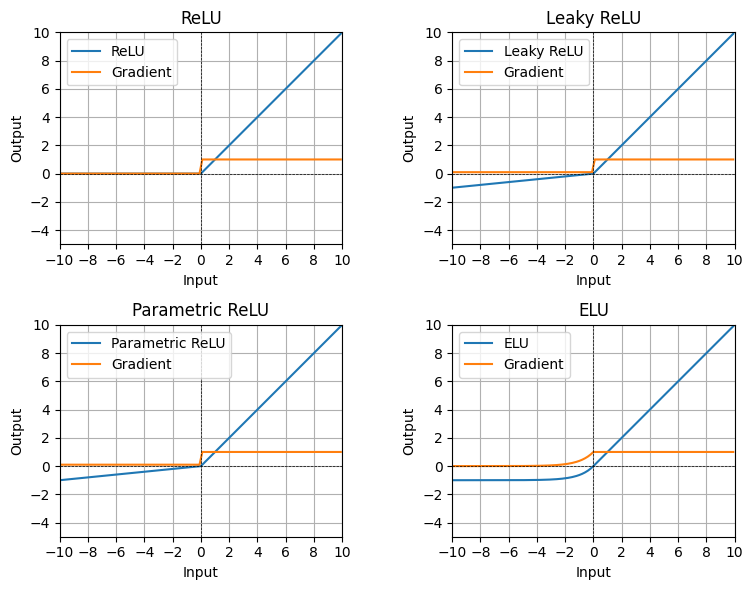

In [46]:
def draw_activation_function(ax, title, activation_fn, **kwargs):
    # draw axis lines
    x = torch.tensor(range(-100, 100, 1), dtype=torch.float32, requires_grad=True)/10.0
    y = activation_fn(x, **kwargs)
    ax.plot(x.detach(), y.detach(), label=title)
    g_y = torch.autograd.grad(y.sum(), x)
    ax.plot(x.detach(), g_y[0].detach(), label='Gradient')

    ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
    ax.axvline(0, color='black', linewidth=0.5, linestyle='--')
    ax.axis([-10, 10, -5, 10])
    ax.set_xticks(range(-10, 11, 2 ))
    ax.set_yticks(range(-4, 11, 2))
    ax.grid(True)
    ax.legend()
    ax.set_xlabel('Input')
    ax.set_ylabel('Output')
    ax.set_aspect('equal')
    ax.set_title(title)

fig, axs = plt.subplots(2, 2, figsize=(8, 6))
draw_activation_function(axs[0, 0], 'ReLU', relu)
draw_activation_function(axs[0, 1], 'Leaky ReLU', leaky_relu, negative_slope=0.1)
draw_activation_function(axs[1, 0], 'Parametric ReLU', parametric_relu, weight=torch.tensor(0.1))
draw_activation_function(axs[1, 1], 'ELU', elu, alpha=1.0)
plt.tight_layout()
plt.show()

# draw_activation_function(ax, x, y, 'ELU')

# plt.show()